# Doc2Vec Songs implementation

https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/doc2vec-lee.ipynb

In [1]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import pandas as pd

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import warnings  
warnings.filterwarnings('ignore')

import codecs
import string
import re

import seaborn as sns

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


### Data loading

In [5]:
df = pd.read_csv('prep_songs_pl_lem_stop_wcrft1.csv', index_col=None)
print(df.shape)
df2 = pd.read_csv('prep_readings_pl_lem_stop_wcrft1.csv', index_col=None)
print(df2.shape)
#titles = [t[1][0] for t in songs.iterrows()]

(186, 2)
(87, 2)


In [6]:
df2.head(2)

,date,txt_pl_lem_tokenized
0,2018-12-02,"['pan', 'mówić', 'nadchodzić', 'dzień', 'wypeł..."
1,2018-12-03,"['ow', 'dzień', 'odrośl', 'pan', 'stanąć', 'oz..."


In [7]:
# polish_stops = codecs.open("polishStopWords",'r','utf-8')
# #stopwords = nltk.corpus.stopwords.words('english')
# stopwords = polish_stops.read().split('\n')
# polish_stops.close()

# def clean_text(text):
#     text = "".join([word.lower() for word in text if word not in string.punctuation])
#     tokens = re.split('\W+', text)
#     #tokens = lemmatizing(tokens)
#     text = [word for word in tokens if word not in stopwords and word not in [' ','']]
#     return text

In [8]:
tagged_data = [TaggedDocument(words=d, tags=[i]) for i, d in enumerate(df.iloc[:,-1])]
print(tagged_data[0])

TaggedDocument(['wyzwolić', 'kajdany', 'siebie', 'chrystus', 'stawać', 'brat', 'nauczyć', 'wołać', 'abba', 'ojciec', 'abba', 'ojciec', 'abba', 'ojciec', 'kościół', 'drzewo', 'życie', 'wieczność', 'zapuszczać', 'korzeń', 'przenikać', 'codzienność', 'pokazować', 'abba', 'ojciec', 'abba', 'ojciec', 'abba', 'ojciec', 'bóg', 'hojny', 'dawca', 'życie', 'wyswobodzić', 'śmierć', 'przygarniać', 'siebie', 'uczynić', 'swój', 'dziecko', 'abba', 'ojciec', 'abba', 'ojciec', 'abba', 'ojciec', 'brat', 'rodzina', 'prawda', 'zaćmić', 'godzina', 'abba', 'ojciec', 'abba', 'ojciec', 'abba', 'ojciec'], [0])


### Training the model

Note: dm defines the training algorithm. If dm=1 means ‘distributed memory’ (PV-DM) and dm =0 means ‘distributed bag of words’ (PV-DBOW). Distributed Memory model preserves the word order in a document whereas Distributed Bag of words just uses the bag of words approach, which doesn’t preserve any word order.

In [9]:
max_epochs = 100
vec_size = 30
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =0)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    #print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v_pl_lem_dm1.model")
print("Model Saved")

F:\ProgramData\Anaconda3\envs\NLP\lib\site-packages\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


Model Saved


## Using the model

In [10]:
model= Doc2Vec.load("d2v_pl_lem_dm1.model")
#to find the vector of a document which is not in training data
#test_data = df2.iloc[:,-3]
y = model.infer_vector(df2.iloc[0,-1])
# print(test_data)
# print()
# print("y_infer:\n", y)

In [11]:
import numpy as np

In [13]:
gospel_vectors = pd.DataFrame()
for i in range(len(df2)):
    y = model.infer_vector(df2.iloc[i,-1])
    gospel_vectors[i] = y
print(gospel_vectors.shape)
gospel_vectors.head()


(30, 87)


,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,0.143526,0.243684,0.297763,0.296102,0.211998,0.264190,0.210466,0.324934,0.114202,0.138324,...,0.193047,0.297760,0.174953,0.176718,0.327377,0.370483,0.309732,0.254035,0.325857,0.034885
1,-0.276593,-0.142589,-0.075580,0.055882,-0.144620,-0.087071,0.062088,0.124992,-0.102571,-0.163473,...,-0.184698,-0.239261,0.119604,-0.277373,0.133383,-0.154269,-0.165650,-0.102380,-0.428863,-0.076407
2,0.091128,0.181835,-0.124974,0.187367,0.157194,-0.154067,-0.047171,0.035801,-0.030392,0.128292,...,-0.022101,-0.336085,-0.424635,-0.163809,0.109448,0.014035,0.290051,0.019642,-0.189405,-0.054752
3,-0.209004,0.083847,-0.047648,-0.414954,-0.279436,0.017475,0.039142,0.053254,0.171827,-0.018055,...,-0.002672,-0.064555,-0.215503,0.091725,-0.218392,-0.158867,-0.000191,-0.122712,-0.192212,-0.120833
4,0.213692,-0.009990,-0.259649,-0.020691,0.239476,-0.038661,0.051520,0.084757,0.081093,0.133488,...,0.013744,-0.018106,0.078622,0.050665,0.315292,-0.032693,0.070926,-0.038671,-0.020832,0.301124


In [14]:
df_g = gospel_vectors.transpose()

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
X = model.docvecs.vectors_docs
X.shape

(186, 30)

In [17]:
sim = cosine_similarity(X, df_g)

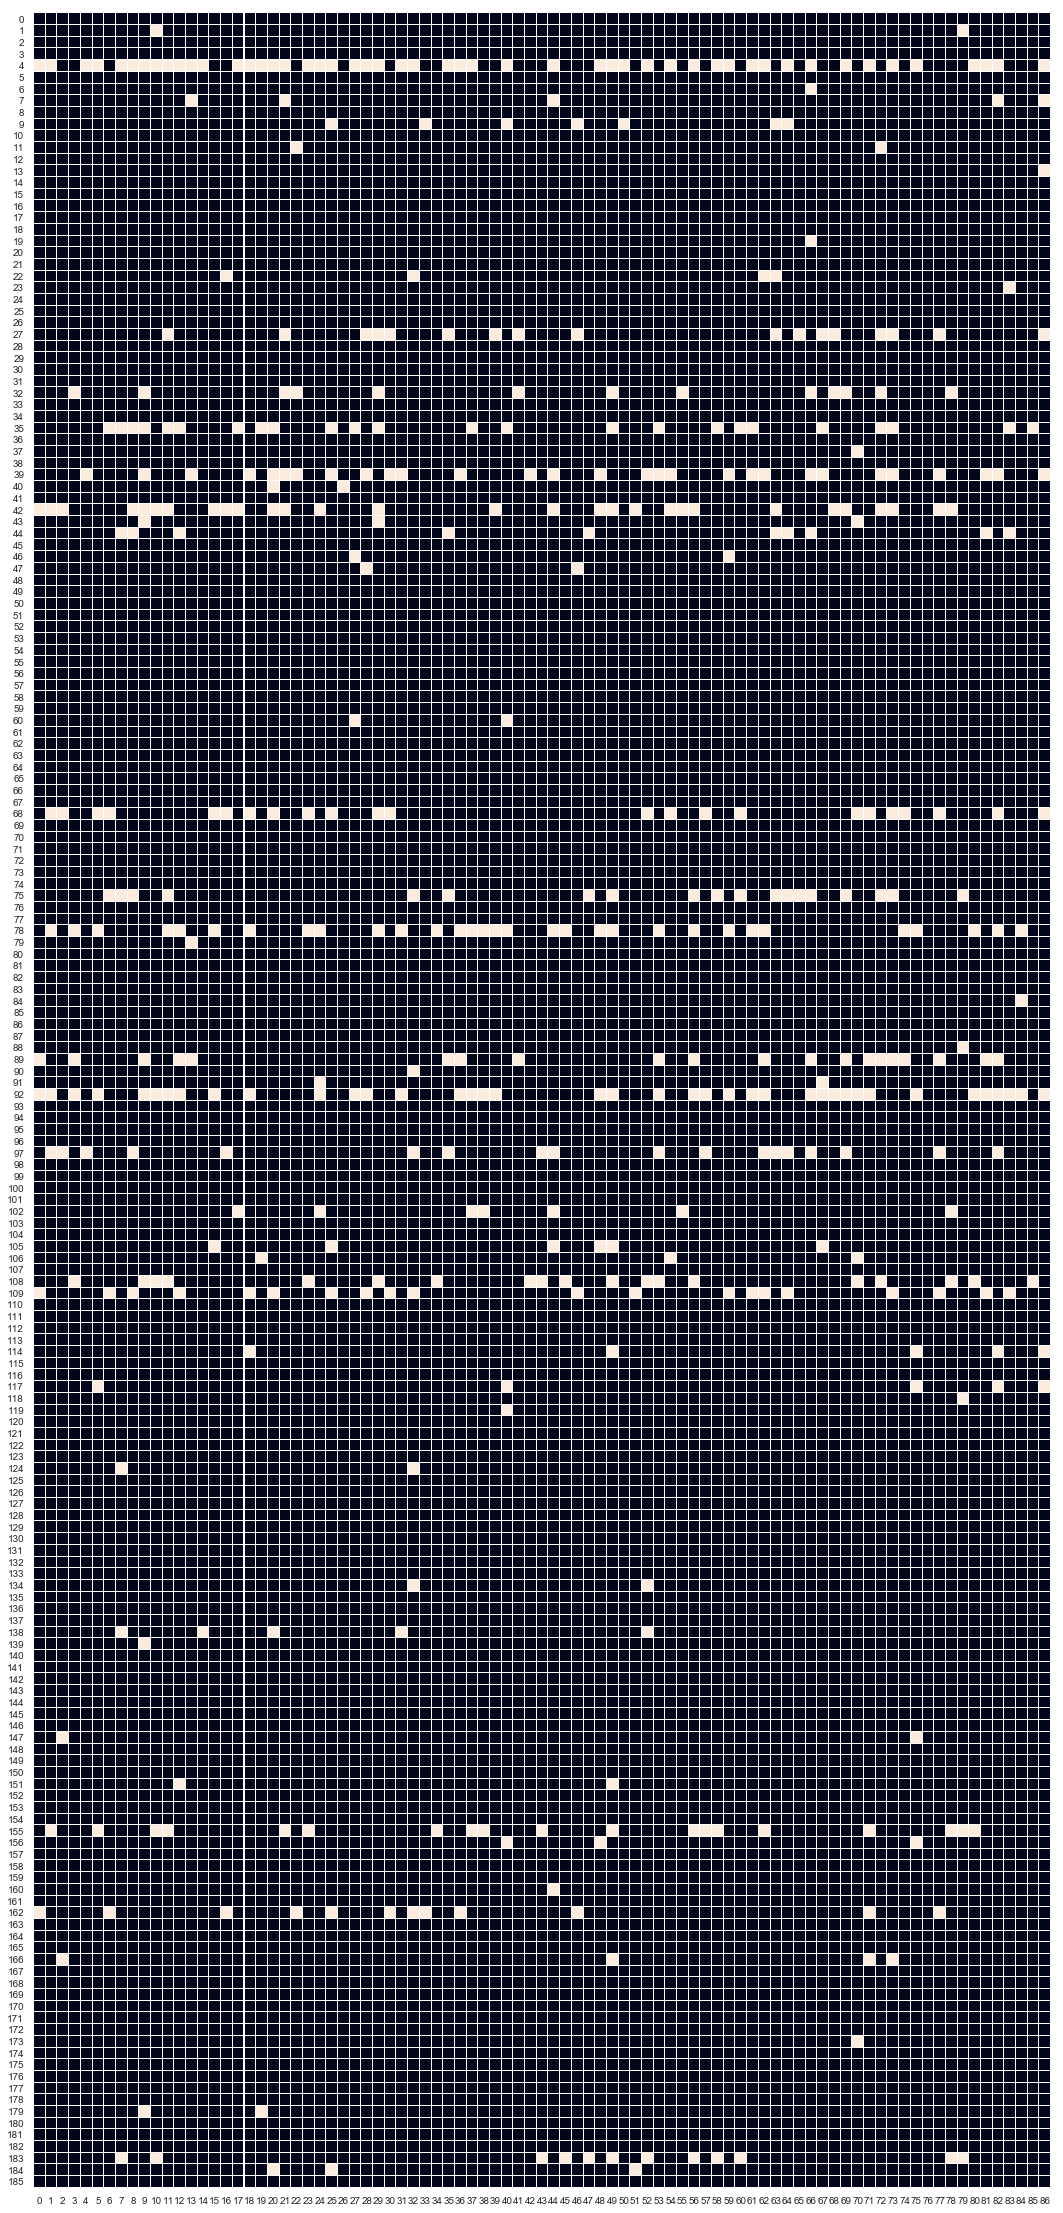

In [29]:
plt.figure(figsize=(60,40))
sns.set(font_scale=0.9)
sns.heatmap(sim >= 0.5, cbar=False, annot=False, #xticklabels= titles, 
            #yticklabels = titles, 
            square=True,
          linewidths=.01
           )
plt.xticks(rotation=0) 
plt.show()

In [56]:
sim.max()

0.85256886

In [23]:
df_s = pd.read_csv('piosenki_pl_en.csv', header=0)

In [22]:
df_r = pd.read_csv('prep_readings_pl_FILTERED.csv', header=0, index_col=0)
df_r.head(2)

,Pierwsze czytanie,Psalm_ref,Psalm,Ewangelia,total,Pierwsze czytanie_tokenized_lower_nostops,Psalm_ref_tokenized_lower_nostops,Psalm_tokenized_lower_nostops,Ewangelia_tokenized_lower_nostops,total_tokenized_lower_nostops
2018-12-20,Pan przemówił do Achaza tymi słowami: „Proś dl...,"Przybądź, o Panie, Tyś jest Królem chwały","Do Pana należy ziemia i wszystko, co ją napełn...",Bóg posłał anioła Gabriela do miasta w Galilei...,Pan przemówił do Achaza tymi słowami: „Proś dl...,"['przemówił', 'achaza', 'tymi', 'słowami', 'pr...","['przybądź', 'panie', 'tyś', 'królem', 'chwały']","['należy', 'ziemia', 'napełnia', 'świat', 'mie...","['bóg', 'posłał', 'anioła', 'gabriela', 'miast...","['przemówił', 'achaza', 'tymi', 'słowami', 'pr..."
2018-12-19,"W Sorea, w pokoleniu Dana, żył pewien mąż imie...","Będę opiewał chwałę Twoją, Boże",Bądź dla mnie skałą schronienia i zamkiem wa...,"Za czasów Heroda, króla Judei, żył pewien kapł...","W Sorea, w pokoleniu Dana, żył pewien mąż imie...","['sorea', 'pokoleniu', 'dana', 'żył', 'pewien'...","['opiewał', 'chwałę', 'twoją', 'boże']","['bądź', 'skałą', 'schronienia', 'zamkiem', 'w...","['czasów', 'heroda', 'króla', 'judei', 'żył', ...","['sorea', 'pokoleniu', 'dana', 'żył', 'pewien'..."


In [26]:
print(df_s.iloc[75]['pl'])
print()
print(df_r.iloc[7]['Ewangelia'])

 Laudato si, o mi Signore.  Niech Cię wysławia to, co stworzyłeś:  Słońce na niebie, księżyc wśród nocy.  Gwiazdy świecące, wiatry gwałtowne,  Żywioły wodne, ogień gorący.  Laudato si, o mi Signore.  I siostra nasza, matka ziemia, Ta, co nas żywi i wychowuje, Słodkie owoce, kwiaty i zioła, I szczyty górskie, morskie głębiny.  Laudato si, o mi Signore.  Trzeba nam chwalić Ciebie, o Boże, Trzeba nam śpiewać Tobie, o Boże, Bo to jest sensem naszego życia. Niech całe życie będzie piosenką! 

Pewnego dnia, gdy Jezus nauczał, siedzieli przy tym faryzeusze i uczeni w Prawie, którzy przyszli ze wszystkich miejscowości Galilei, Judei i Jerozolimy. A była w Nim moc Pańska, że mógł uzdrawiać.Wtem jacyś ludzie niosąc na łożu człowieka, który był sparaliżowany, starali się go wnieść i położyć przed Nim. Nie mogąc z powodu tłumu w żaden sposób przynieść go, wyszli na płaski dach i przez powałę spuścili go wraz z łożem w sam środek przed Jezusa. On widząc ich wiarę, rzekł: „Człowieku, odpuszczają ci 

In [67]:
print(df_s.iloc[19]['en'])
print()
print(df_r.iloc[47]['Ewangelia'])

Christ the Lord, God's Son, our Savior agreed to take my sin, he would die for me, that I would know my greatness of wine, and know that his blood saves purify and heals. Be it high Jesus, O my Lamb, You are the only Redeemer, You are my King. Exalted, be God's Lamb, before Your throne, I pay the highest praise today.

With the birth of Jesus Christ it was like this. After the marriage of his mother, Mary, to Joseph, first they lived together, she found herself pregnant by the Holy Spirit. Her husband, Joseph, who was a righteous man and did not want to expose her to defamation, intended to dismiss her secretly. When he thought of this, behold, the angel of the Lord appeared to him in a dream, and said: "Joseph, son of David, do not be afraid to take Mary, your wife, into you; For from the Holy Spirit is what is conceived in her. He will give birth to a son, to whom you will name Jesus, for he will save his people from his sins. " And all this happened, that the word of the Lord would 

In [74]:
print(df_s.iloc[132]['pl'])
print()
print(df_r.iloc[43]['Ewangelia'])
print()
print(df_r.iloc[78]['Ewangelia'])

 Przyjdź jak deszcz, ożyw dziś  suchą ziemię naszych serc. Przyjdź jak deszcz na spragniony świat. Dotknij nas tak jak wiatr,  rozpędź smutek, otrzyj łzy, zabierz tam, gdzie się  w radość zmienia strach. Wszystko dziś nowe staje się.  Panie, przyjdź i napełnij mnie  Przyjdź jak deszcz do spragnionych serc  tak pragniemy Ciebie, Panie. Niech Twa moc dziś objawi się,  pokaż swoją chwałę!  Przyjdź jak deszcz, Panie nasz, obmyj gorycz, żal i ból. Pozwól dziś niech nadzieja kwitnie w nas. To, co złe zniknie gdzieś,  nowy dzień nastaje już. Jesteś jak słońca blask w pochmurny czas. Wszystko dziś nowe staje się.  Panie, przyjdź i napełnij mnie  Przyjdź jak deszcz do spragnionych serc  tak pragniemy Ciebie, Panie. Niech Twa moc dziś objawi się,  pokaż swoją chwałę! 

At that time, Mary said, "My soul magnifates the Lord, and my spirit rejoices in God, my Savior. For he looked on the humiliation of his handmaid, for from now on all generations will bless me. For the Almighty has done great thin

In [70]:
print(df_s.iloc[178]['pl'])
print()
print(df_r.iloc[66]['Ewangelia'])

 Jesteśmy Twymi dziećmi, potrzebujemy Ciebie,  miłości która trwa.  Dobroci nieskończonej, łaski i nadziei  na wybawienie.  Zbawca, On porusza góry, mój Bóg ma zbawienia moc,  On ma zbawienia moc. Na zawsze sprawca odkupienia, Zmartwychwstał pokonał śmierć Jezus zwyciężył śmierć.  Więc weź mnie, jakim jestem,  z mym grzechem i mym lękiem wypełnij życie me. Oddaję moje serce, wszystko to, w co wierzę oddaję Tobie.  Zbawca, On porusza góry, mój Bóg ma zbawienia moc,  On ma zbawienia moc. Na zawsze sprawca odkupienia, Zmartwychwstał pokonał śmierć Jezus zwyciężył śmierć.  Ześlij światło, niechaj ujrzy świat tę chwałę, co roztacza zmartwychwstały Pan, Jezus.  Zbawca, On porusza góry, mój Bóg ma zbawienia moc,  On ma zbawienia moc. Na zawsze sprawca odkupienia, Zmartwychwstał pokonał śmierć Jezus zwyciężył śmierć. 

Jesus said to his disciples, "They will raise their hands and persecute you. They will send you to synagogues and to prisons, and because of my name they will bring you before k

In [32]:
# to find most similar doc using tags
similar_doc = model.docvecs.most_similar(0)
print(similar_doc)

[(168, 0.6228452920913696), (17, 0.6019831299781799), (49, 0.6016895174980164), (96, 0.5520732998847961), (160, 0.5284604430198669), (28, 0.5260314345359802), (100, 0.5204389095306396), (40, 0.4868106245994568), (105, 0.472426176071167), (145, 0.45972174406051636)]


In [34]:
# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs[1])

[-0.21281973  0.65848994  0.58551097 -0.31633097 -0.04639483  0.3998009
 -0.22921547 -0.49964404  0.20326036 -0.1273587  -0.0104002   0.22056732
  0.00157219  0.26686725 -0.02561359 -0.5023623   0.04322993 -0.23714826
 -0.711669    0.23501642  0.04505616  0.229271   -0.4986817  -0.08412924
  0.23431595 -0.5889407   0.24091995 -0.05551881  0.16569453 -0.32384166]


(185, 30)

In [37]:
y

array([-0.0166401 ,  0.5378013 ,  0.10463084, -0.13298643,  0.18328062,
       -0.2992653 ,  0.2537782 ,  0.30917037,  0.00703668, -0.14858988,
       -0.09594034,  0.19442432, -0.06299414,  0.34067178,  0.09117932,
       -0.29375944,  0.04369237,  0.16206333,  0.1312406 ,  0.4625342 ,
       -0.5537222 ,  0.54908824, -0.3457171 , -0.21346757, -0.23813201,
       -0.09423459,  0.31797346,  0.6324776 ,  0.30810988, -0.3667344 ],
      dtype=float32)

### Visualization

In [39]:
X_embedded = TSNE(n_components=2).fit_transform(X)
Y_embedded = TSNE(n_components=2).fit_transform(y.reshape(-1,1))
#Y2_embedded = TSNE(n_components=2).fit_transform(y2)

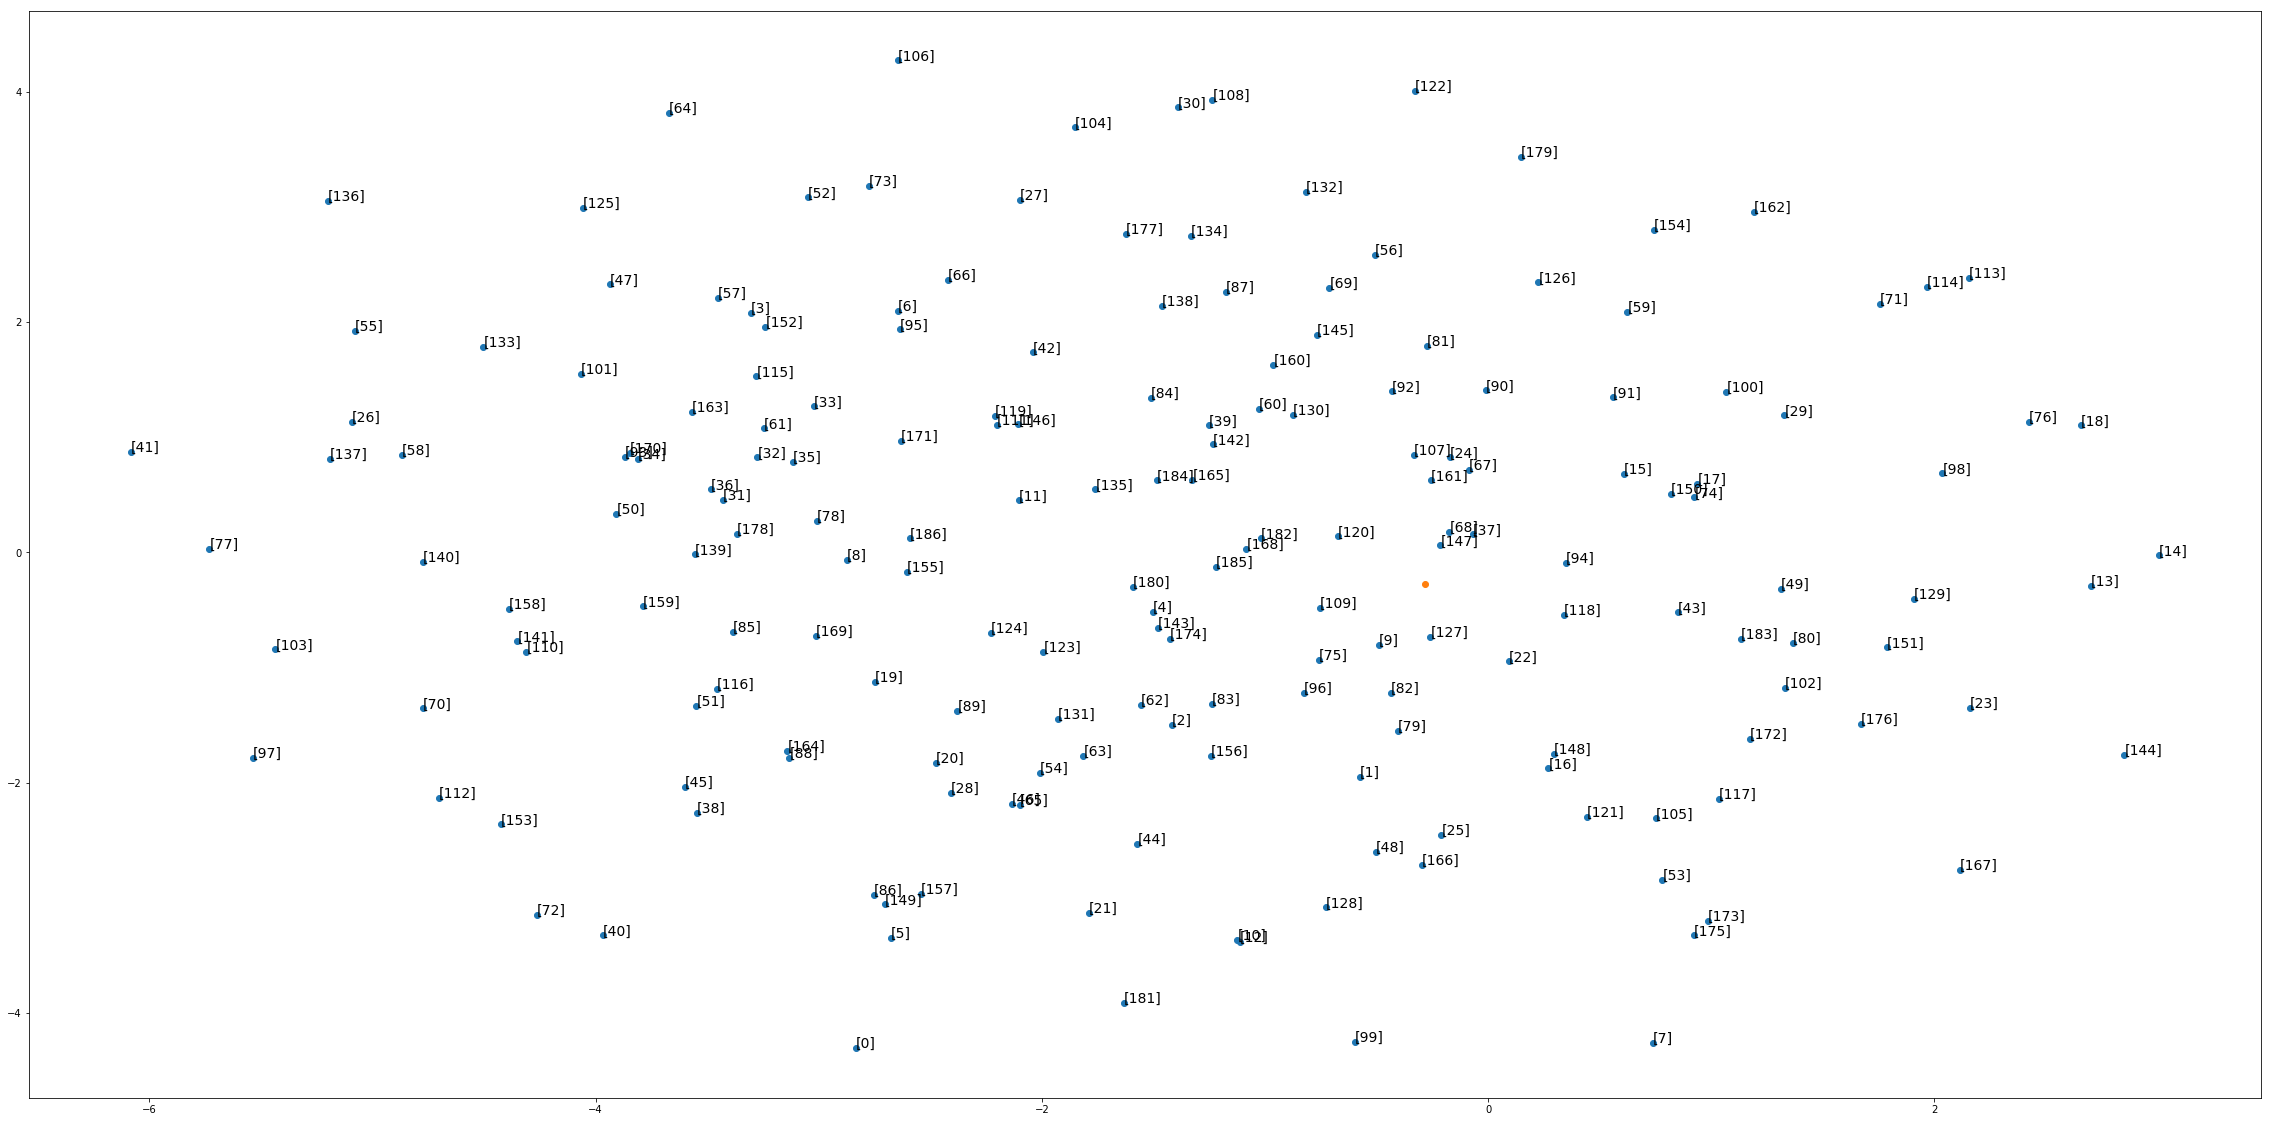

In [43]:
plt.figure(figsize=(40,20))
plt.scatter(X_embedded[:,0],X_embedded[:,1])
for i in range(X.shape[0]):
    plt.annotate(tagged_data[i][1], (X_embedded[i,0],X_embedded[i,1]), fontsize=14)
plt.scatter(y[0],y[1])
plt.show()

In [12]:
readings['Ewangelia'][40]

'Na początku było Słowo, a Słowo było u Boga, i Bogiem było Słowo. Ono było na początku u Boga. Wszystko przez Nie się stało, a bez Niego nic się nie stało, co się stało. W Nim było życie, a życie było światłością ludzi, a światłość w ciemności świeci i ciemność jej nie ogarnęła. Pojawił się człowiek posłany przez Boga, Jan mu było na imię. Przyszedł on na świadectwo, aby zaświadczyć o Światłości, by wszyscy uwierzyli przez niego. Nie był on światłością, lecz posłanym, aby zaświadczyć o Światłości. Była Światłość prawdziwa, która oświeca każdego człowieka, gdy na świat przychodzi. Na świecie było Słowo, a świat stał się przez Nie, lecz świat Go nie poznał. Przyszło do swojej własności, a swoi Go nie przyjęli. Wszystkim tym jednak, którzy Je przyjęli, dało moc, aby się stali dziećmi Bożymi, tym, którzy wierzą w imię Jego, którzy ani z krwi, ani z żądzy ciała, ani z woli męża, ale z Boga się narodzili. Słowo stało się ciałem i zamieszkało między nami. I oglądaliśmy Jego chwałę, chwałę, j

In [13]:
print(songs['Eng'][102], '\n\n', songs['Eng'][117])

Praise him all nations, and praise him to all peoples. His mercifulness over us is powerful, and his loyalty lasts forever. For alleluia, alleluja !!! 

 The Lord is exalted, our King exalted in glory, and let us praise him. O Lord, O lifted up, O King, O exalted, let us worship Him. The Lord is the King, his grace lasts forever. Heaven and Earth, they rejoice in His name. Lord exalted, our King exalted among the glories.


In [14]:
len(Y_embedded)

30

## Annoy

Narzędzie używane przez Spotify do bardzo szybkiego znajdowania najbliższych sąsiadów (przybliżonych)

In [23]:
from annoy import AnnoyIndex
import random

k = 10 #number of nearest neighbors
f = 30 #vector length
t = AnnoyIndex(f)  # Length of item vector that will be indexed
for i in range(n):
    v = [random.gauss(0, 1) for z in range(f)]
    t.add_item(i, v)

t.build(10) # 10 trees

"""t.save('test.ann')

# ...

u = AnnoyIndex(f)
u.load('test.ann') # super fast, will just mmap the file"""

print(t.get_nns_by_item(0, n)) # will find the k nearest neighbors

[0, 2, 5, 4, 3, 7, 9, 6, 1, 8]
